In [7]:
import tensorflow as tf
import numpy as np
import numpy.random as rng


C:\Users\prash\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
#Creating the dataset 
inshape=30 #input size
hiddenshape=20 # No of hidden units 
outshape=10 # Output size 

batch_size = 50

#Training parameters 
iterations=1000
i=tf.Variable(0,name='loop_i')
#eta=tf.constant(0.00001,dtype=tf.float64)

#Training data inputs
x=tf.placeholder(tf.float64,[inshape,None], name = 'x')
y=tf.placeholder(tf.float64,[outshape,None], name = 'y')

#Linear network
#B=tf.random_normal([hiddenshape,outshape],mean=0.0,stddev=1.0,dtype=tf.float64)
#w_1=tf.random_normal([inshape,hiddenshape],mean=0.0,stddev=1.0,dtype=tf.float64)
#w_2=tf.random_normal([hiddenshape,outshape],mean=0.0,stddev=1.0,dtype=tf.float64)

#parameters for feedback alignment
B = tf.Variable(rng.randn(hiddenshape, outshape))
w_1 = tf.Variable(rng.randn(hiddenshape, inshape))
w_2= tf.Variable(rng.randn(outshape, hiddenshape))

hidout=tf.matmul(w_1,x)
y_pred_fa=tf.matmul(w_2,hidout) 

e_fa=y_pred_fa-y
cost_fa = tf.reduce_sum(tf.pow(e_fa, 2))/2
Be=tf.matmul(B,e_fa)

dLw1=tf.matmul(Be,tf.transpose(x))
dLw2=tf.matmul(e_fa,tf.transpose(hidout))

#Parameters for back propogation

w1bp=tf.Variable(w_1.initialized_value())
w2bp=tf.Variable(w_2.initialized_value())

#1bp=w_1 
#2bp=w_2

hidout_bp=tf.matmul(w1bp,x)
y_pred_bp=tf.matmul(w2bp,hidout_bp)

e_bp=y_pred_bp-y
cost_bp = tf.reduce_sum(tf.pow(e_bp, 2))/2
We=tf.matmul(tf.transpose(w2bp),e_bp)

dLw1bp=tf.matmul(We,tf.transpose(x))
dLw2bp=tf.matmul(e_bp,tf.transpose(hidout_bp))

#Training data generation
#x=tf.random_normal([inshape,1],mean=0.0,stddev=1.0,dtype=tf.float64)
#y=tf.matmul(T,x)
#T=tf.random_normal([outshape,inshape],mean=0.0,stddev=1.0,dtype=tf.float64)
T = rng.randn(outshape, inshape)
def traindata(T, batch_size):
    train_x = rng.randn(T.shape[1], batch_size)
    train_y = np.dot(T, train_x)
    return (train_x, train_y)

In [9]:
def updatefa(w_1,w_2,eta):    
    #gradients for a loss L 
    #Update
    #w_1=tf.subtract(w_1,tf.multiply(eta,tf.transpose(dLw1)))
    #w_2=tf.subtract(w_2,tf.multiply(eta,tf.transpose(dLw2))) 
    new_w1 = w_1.assign(w_1-tf.multiply(eta,dLw1))
    new_w2 = w_2.assign(w_2-tf.multiply(eta,dLw2)) 
    return new_w1, new_w2 

def updatebp(w1bp,w2bp,eta):
    new_w1bp=w1bp.assign(w1bp-tf.multiply(eta,dLw1bp))
    new_w2bp=w2bp.assign(w2bp-tf.multiply(eta,dLw2bp))
    return new_w1bp,new_w2bp


In [29]:
init = tf.global_variables_initializer()
costfa=[]
costbp=[]
storedot=[]
learnrate=[1e-5,1e-4,1e-3,1e-2,1e-1,1]
sto=len(learnrate)
costfa=[[]*sto]*iterations
costbp=[[]*sto]*iterations
for rate in range(len(learnrate)):
    cfa=0
    cbp=0
    print("Iterating for learning rate:",learnrate[rate])
    with tf.Session() as sess:
        sess.run(init)
        for idx in range(iterations):
            (train_x, train_y) = traindata(T, batch_size)
            #sess.run(update(w_1, w_2), feed_dict = {x:train_x, y:train_y})
            #for jj in range(batch_size):
            eta=tf.constant(learnrate[rate],dtype=tf.float64)
            sess.run(updatefa(w_1,w_2,eta), feed_dict={x: train_x, y: train_y})
            cfa = sess.run(cost_fa, feed_dict={x: train_x, y: train_y})
            costfa[rate].append(cfa)
            sess.run(updatebp(w1bp,w2bp,eta),feed_dict={x: train_x, y: train_y})
            cbp = sess.run(cost_bp, feed_dict={x: train_x, y: train_y})
            costbp[rate].append(cbp)
            if idx % 50==0:
                print("iteration: %d Feedbackalignment: %f\tBackprop:%f"%(idx,cfa,cbp))
                #delta_fa=sess.run(Be)
                #delta_bp=sess.run(We)
                #storedot.append(np.dot(delta_fa,delta_bp))

Iterating for learning rate: 1e-05
iteration: 0 Feedbackalignment: 110727.055739	Backprop:105908.434848
iteration: 50 Feedbackalignment: 22757.768187	Backprop:15600.861322
iteration: 100 Feedbackalignment: 7994.959531	Backprop:6318.159870
iteration: 150 Feedbackalignment: 5070.179084	Backprop:3468.433152
iteration: 200 Feedbackalignment: 4168.074641	Backprop:2978.316626
iteration: 250 Feedbackalignment: 2888.318930	Backprop:2299.407325
iteration: 300 Feedbackalignment: 3149.874301	Backprop:1802.303940
iteration: 350 Feedbackalignment: 2436.518477	Backprop:1623.947678
iteration: 400 Feedbackalignment: 2047.053264	Backprop:1377.508368
iteration: 450 Feedbackalignment: 1785.954929	Backprop:1212.439508
iteration: 500 Feedbackalignment: 1467.892321	Backprop:1229.141196
iteration: 550 Feedbackalignment: 1353.979641	Backprop:866.756246
iteration: 600 Feedbackalignment: 1207.871293	Backprop:901.709398
iteration: 650 Feedbackalignment: 935.520625	Backprop:903.236280
iteration: 700 Feedbackalign

KeyboardInterrupt: 

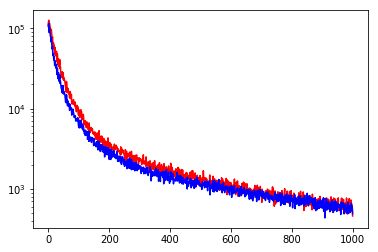

In [6]:
import matplotlib.pyplot as plt
plt.semilogy(costfa,'r')
plt.semilogy(costbp,'b')
plt.legend()
plt.show()

In [28]:
print("Iterating for learning rate:",learnrate[rate])

Iterating for learning rate: 1e-05


6